# Lab 2.1 Internal Energy Benchmarking Process

Welcome to this Python exercise session, where we will explore how to develop an energy benchmarking process for a single building using Python programming language. This exercise is designed to provide hands-on experience in data processing, analysis, and visualization techniques commonly used in energy benchmarking. By the end of the session, you will have gained practical knowledge in handling energy consumption data and implementing benchmarking analysis for a building.

In [1]:
# Import necessary libraries and load the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the power dataset
energy_data = pd.read_csv("data_original/building_1_weather_1.csv", parse_dates=["timestamp"], index_col="timestamp")

# Load the weather dataset
weather_data = pd.read_csv("data/weather_1.csv", parse_dates=["timestamp"], index_col="timestamp")


1. **Task Assignment**: Merge Energy and Temperature Datasets and Perform Feature Engineering

Objective: In this task, you will merge two datasets containing energy consumption and temperature data and perform feature engineering to create additional variables that can be used in the subsequent analysis.

Instructions:

- Merge the energy and temperature datasets:
    - Perform an inner join on the index to merge the two DataFrames into a single DataFrame named data. This will ensure that only the rows with matching timestamps in both datasets are included in the merged dataset.
- Perform feature engineering by creating new variables from the timestamp index:
    - Create a new column named "hour" in the data DataFrame by extracting the hour from the DateTime index.
    - Create a new column named "day_of_week" in the data DataFrame by extracting the day of the week from the DateTime index (Monday = 0, Sunday = 6).

After completing this task, you should have a merged dataset containing energy consumption, temperature, and additional time-related variables (hour and day_of_week) in a single DataFrame. This enriched dataset will be used for further analysis, such as developing machine learning models for predicting energy consumption or evaluating the building's energy performance.

In [2]:
# Merge the energy and temperature datasets
data = energy_data.join(weather_data, how='inner')

# Feature engineering
data["hour"] = data.index.hour
data["day_of_week"] = data.index.dayofweek

2. **Task Assignment**: Plot the *power* timeseries. What do you observe?

<Axes: xlabel='timestamp'>

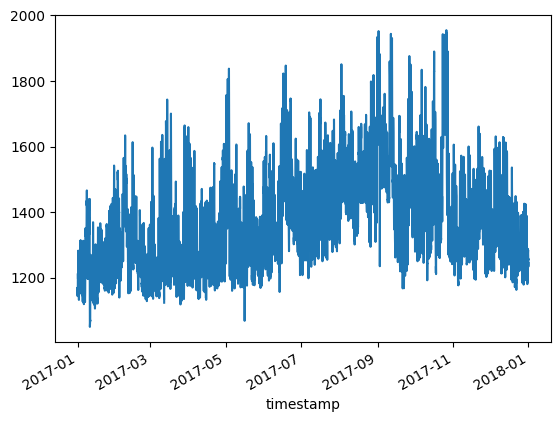

In [3]:
data['power'].plot()

This code defines a function called replace_outliers_na that detects and replaces outliers in a specific column of a given dataset with NaN values. It uses the Interquartile Range (IQR) method for outlier detection.

Here's a step-by-step description of the code:

- Define the function replace_outliers_na with three input arguments: data (Pandas DataFrame), column (name of the column to process), and multiplier (default value is set to 1.5).

- Calculate the first quartile (Q1) and the third quartile (Q3) of the given column using the quantile method of the Pandas DataFrame. Q1 corresponds to the 25th percentile, and Q3 corresponds to the 75th percentile.

- Calculate the Interquartile Range (IQR) by subtracting Q1 from Q3. The IQR represents the range of the middle 50% of the data.

- Calculate the lower and upper bounds for outlier detection. This is done by subtracting multiplier times IQR from Q1 for the lower bound and adding multiplier times IQR to Q3 for the upper bound. The default multiplier value is 1.5, which is commonly used for detecting mild outliers.

- Create a Boolean mask for the rows in the DataFrame where the values in the specified column are either below the lower bound or above the upper bound. This mask will be used to identify the outliers in the dataset.

- Use the .loc indexer with the Boolean mask to replace the outlier values in the specified column with NaN values. This operation is performed in-place on the input DataFrame.

- Return the DataFrame with outliers replaced by NaN values.

- Call the replace_outliers_na function with the input DataFrame (e.g., data) and the target column (e.g., 'power') to process. The function is called on a copy of the DataFrame to avoid modifying the original dataset.

By using this function, outliers in the specified column are replaced with NaN values, allowing for further processing or filtering of the dataset.

In [4]:
#outlier detection

def replace_outliers_na(data, column, multiplier=1.5):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter the dataset to remove the outliers
    mask = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[mask, column] = np.nan

    return data

data = replace_outliers_na(data.copy(), 'power')

3. **Task Assignment**: Print the amount of nas values in the columns **power** and **airTemperature**.

In [5]:
print(data['power'].isna().sum())
print(data['airTemperature'].isna().sum())

173
0


In [6]:
data['airTemperature'].interpolate(method='spline', inplace=True, order=3)

4. **Task Assignment**: Remove Rows with NaN Values in the Power Column

Remove rows with NaN values in the 'power' column:

- Use the dropna() method on the DataFrame with the subset parameter set to ['power']. This will remove all rows where the 'power' column contains NaN values.
- Assign the resulting DataFrame back to the variable data to store the updated dataset.

In [7]:
data = data.dropna(subset=['power'])

5. **Task Assignment**: Perform Train-Test Split on the Dataset

Perform the train-test split based on date ranges:

- Create a variable called train and assign it the subset of the DataFrame for the date range from January 1, 2017, to October 31, 2017. Use the DateTime index to slice the DataFrame accordingly.
- Create a variable called test and assign it the subset of the DataFrame for the date range from November 1, 2017, to December 31, 2017. Use the DateTime index to slice the DataFrame accordingly.

In [8]:
# Train-test split
train = data["2017-01-01":"2017-10-31"]
test = data["2017-11-01":"2017-12-31"]

The following code separates the features (independent variables) and the target variable (dependent variable) for both the training and testing datasets.

In [9]:
X_train = train.drop("power", axis=1)
y_train = train["power"]
X_test = test.drop("power", axis=1)
y_test = test["power"]

In [10]:
# Model definition
model = RandomForestRegressor()  # You can replace this with other models from scikit-learn

6. **Task Assignment**: Implement Mean Absolute Percentage Error (MAPE) Function

Objective: In this task, you will implement a function to calculate the Mean Absolute Percentage Error (MAPE) metric for evaluating the performance of a regression model.

Instructions:

- Define a function called mean_absolute_percentage_error with two input arguments: y_true (true target values) and y_pred (predicted target values).

In the function, calculate the MAPE by following these steps:

- Compute the absolute difference between y_true and y_pred.
- Divide the absolute difference by the true target values (y_true).
- Compute the mean of the resulting values.
- Multiply the mean by 100 to get the percentage error.
- Return the calculated MAPE value.

After completing this task, you should have a function that calculates the Mean Absolute Percentage Error, which can be used to evaluate the performance of regression models on your dataset.

In [11]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

7. **Task Assignment**: Fit and Predict with a Machine Learning Model

Train the machine learning model on the training dataset and make predictions on the testing dataset.

In [12]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

8. **Task Assignment**: Calculate and Print Evaluation Metrics

Objective: In this task, you will compute and display the Mean Absolute Percentage Error (MAPE), Mean Absolute Error (MAE), and Mean Squared Error (MSE) for the model's predictions on the testing dataset.

In [13]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAPE: {mape:.2f}%")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")

MAPE: 5.99%
MAE: 81.72
MSE: 9236.96


9. **Task Assignment**: Visualize Actual and Predicted Power Values

Objective: In this task, you will create a line plot to visualize the actual and predicted power values for both the training and testing datasets, showing the performance of the internal energy benchmarking model.

Instructions:

- Generate predictions for the training dataset using the trained model.
- Create a line plot with separate lines for actual and predicted power values in the training and testing datasets.
- Customize the plot with appropriate axis labels, title, and legend.
- Display the plot to visualize the model's performance in predicting power consumption.

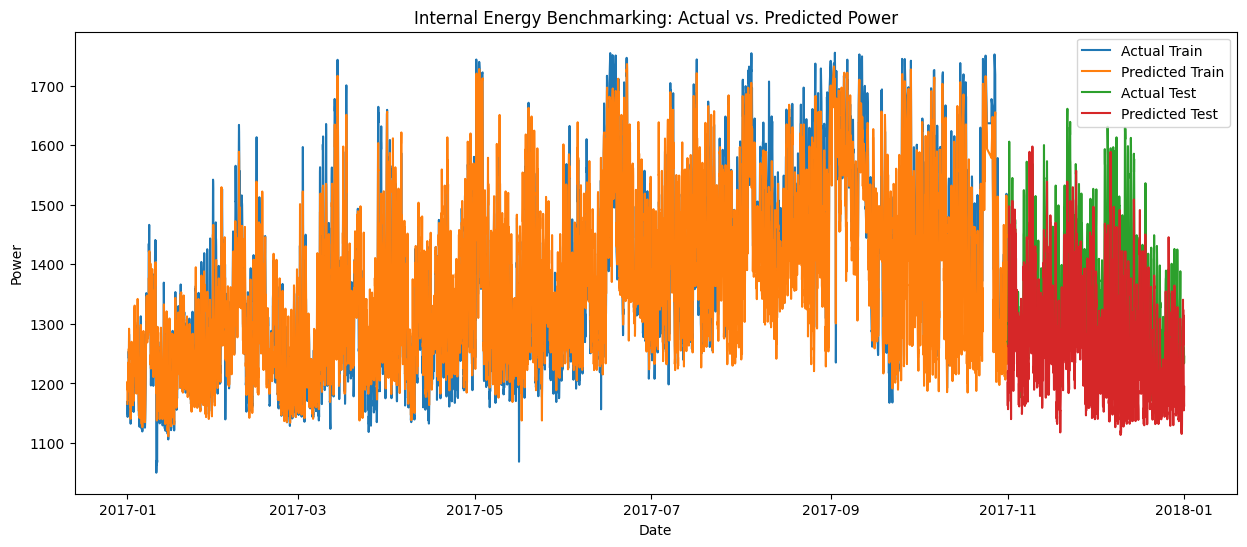

In [14]:
# Line plot with predictions and real values for both training and testing
y_train_pred = model.predict(X_train)

plt.figure(figsize=(15, 6))
plt.plot(train.index, y_train, label="Actual Train")
plt.plot(train.index, y_train_pred, label="Predicted Train")
plt.plot(test.index, y_test, label="Actual Test")
plt.plot(test.index, y_pred, label="Predicted Test")
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("Internal Energy Benchmarking: Actual vs. Predicted Power")
plt.legend()
plt.show()

This code creates a histogram to visualize the distribution of errors for both the training and testing datasets in the internal energy benchmarking model.

- It calculates the errors for the training dataset (train_errors) and testing dataset (test_errors) by subtracting the predicted values from the actual values.
- It initializes a new figure with a specified size using plt.figure().
- The sns.histplot() function from the Seaborn library is used to create histograms for both training and testing errors. The kde=True argument adds a kernel density estimate (KDE) curve to the histograms.
- The histograms are plotted with different colors and labels to distinguish between training and testing errors.
- The plot is customized with axis labels, a title, and a legend.
- Finally, the plot is displayed using plt.show(), allowing you to visualize and compare the error distributions for the training and testing datasets.

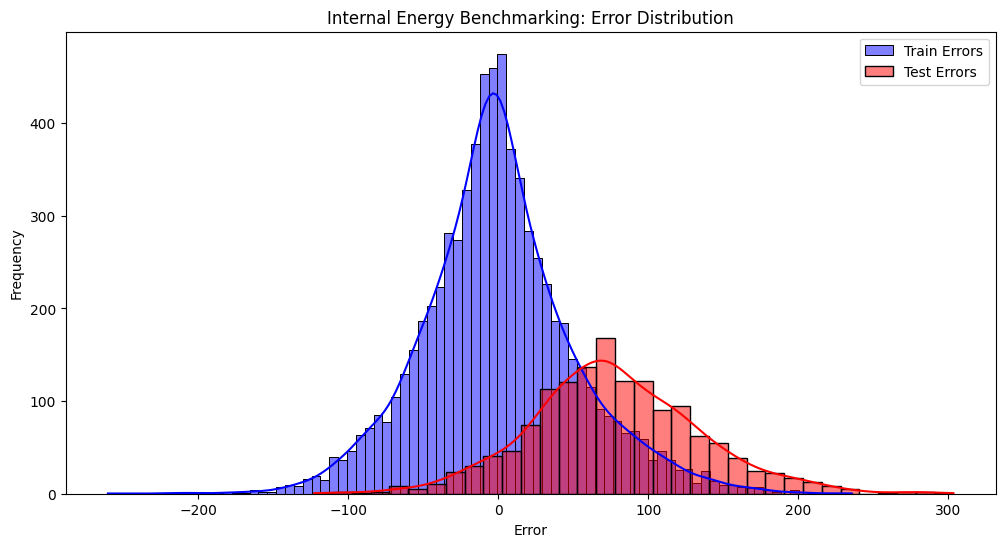

In [15]:
# Plot with the distribution of the errors for both training and testing
train_errors = y_train - y_train_pred
test_errors = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(train_errors, kde=True, color="blue", label="Train Errors")
sns.histplot(test_errors, kde=True, color="red", label="Test Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Internal Energy Benchmarking: Error Distribution")
plt.legend()
plt.show()

The following code defines a function named "prediction_intervals" that takes four inputs: y_true_train, y_pred_train, y_pred_test, and alpha.

The function calculates the prediction intervals for a regression model. Specifically, it calculates the upper and lower bounds of the confidence interval for the predicted values.

To do this, the function first calculates the errors between the true and predicted values of the training data. It then calculates the standard deviation of these errors using NumPy's std function.

The function then calculates the z-score for the given alpha level using the percent-point function (ppf) from the normal distribution in the scipy.stats module.

Finally, it calculates the upper and lower bounds of the prediction interval by adding and subtracting the product of the z-score and the standard deviation of the errors from the predicted test values.

The function returns the lower and upper bounds of the prediction interval, which are assigned to the variables lower_bounds and upper_bounds, respectively.

In [16]:
import scipy.stats as stats

def prediction_intervals(y_true_train, y_pred_train, y_pred_test, alpha=0.95):
    errors = y_true_train - y_pred_train
    std_errors = np.std(errors)
    z_score = stats.norm.ppf(1 - (1 - alpha) / 2)
    
    lower_bounds = y_pred_test - z_score * std_errors
    upper_bounds = y_pred_test + z_score * std_errors
    
    return lower_bounds, upper_bounds

lower_bounds, upper_bounds = prediction_intervals(y_train, y_train_pred, y_pred)

The code creates a plot to visualize the actual test values, predicted test values, and prediction intervals for a regression model.

It first creates a new figure with a specific size using the plt.figure() function.

Then, it plots the actual test values and predicted test values against the dates of the test data using the plt.plot() function.

Next, it fills the area between the lower and upper bounds of the prediction intervals with a gray color and an alpha (transparency) of 0.5 using the plt.fill_between() function. This indicates the range of possible error in the predicted values.

The plot's x-axis is labeled as "Date," and the y-axis is labeled as "Power." The title of the plot is "Internal Energy Benchmarking: Actual vs. Predicted Power."

Finally, a legend is added to the plot using the plt.legend() function to indicate the meaning of each line in the plot. The plot is displayed using the plt.show() function.

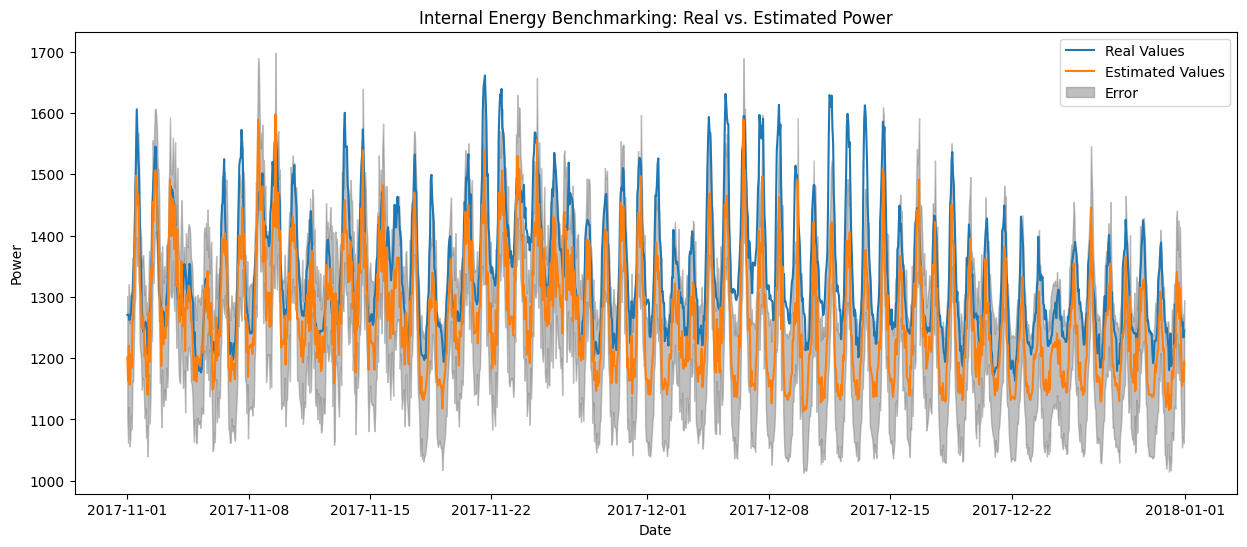

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(test.index, y_test, label="Real Values")
plt.plot(test.index, y_pred, label="Estimated Values")
plt.fill_between(test.index, lower_bounds, upper_bounds, color="gray", alpha=0.5, label="Error")
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("Internal Energy Benchmarking: Real vs. Estimated Power")
plt.legend()
plt.show()

This code calculates the underconsumption of energy in the testing dataset and its percentage with respect to the total energy consumption in the internal energy benchmarking context.

- It calculates the underconsumption by subtracting the actual power consumption (test['power']) from the lower bounds of the confidence intervals (lower_bounds), storing the result in the underconsumption column of the test DataFrame.
- The clip() function is used to replace any negative values in the underconsumption column with 0, as negative underconsumption values do not make sense in this context.
- It calculates the total underconsumption by summing the underconsumption column, rounding the result to one decimal place.
- It calculates the total energy consumption by summing the power column, rounding the result to one decimal place.
- The underconsumption percentage is calculated by dividing the total underconsumption by the total energy consumption and multiplying by 100, rounding the result to two decimal places.
- Finally, the total underconsumption and its percentage are printed out for further analysis and interpretation.

In [18]:
test['underconsumption'] = lower_bounds - test['power']
test['underconsumption'] = test['underconsumption'].clip(lower=0)
total_underconsumption = np.round(test['underconsumption'].sum(), 1)
total_consumption = np.round(test['power'].sum(), 1)
underconsumption_percentage = np.round(total_underconsumption/total_consumption*100, 2)
print(f'Total underconsumption identified: {total_underconsumption} kWh')
print(f'Percentage of underconsumption over total: {underconsumption_percentage} %')

Total underconsumption identified: 27.6 kWh
Percentage of underconsumption over total: 0.0 %


C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\2461768829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['underconsumption'] = lower_bounds - test['power']
C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\2461768829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['underconsumption'] = test['underconsumption'].clip(lower=0)


Same thing for overconsumption

In [19]:
test['overconsumption'] = test['power'] - upper_bounds
test['overconsumption'] = test['overconsumption'].clip(lower=0)
total_overconsumption = np.round(test['overconsumption'].sum(), 1)
overconsumtion_percentage = np.round(total_overconsumption/total_consumption*100, 2)
print(f'Total underconsumption identified: {total_overconsumption} kWh')
print(f'Percentage of underconsumption over total: {overconsumtion_percentage} %')

Total underconsumption identified: 19095.4 kWh
Percentage of underconsumption over total: 0.97 %


C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\3021277316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['overconsumption'] = test['power'] - upper_bounds
C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\3021277316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['overconsumption'] = test['overconsumption'].clip(lower=0)


The following code groups the dataset by date, calculates the sum of the underconsumption column for each date, and creates a new dataframe called underconsumption_day with the date as the index and the sum of underconsumption for each date as the value.

The next lines of code create a visualization of the underconsumption data using a calendar heatmap. The calmap library is used to create the heatmap, and the yearplot function is used to create the visualization for the year 2017. The heatmap shows the amount of underconsumption for each day of the year, with warmer colors indicating higher values and cooler colors indicating lower values.

Finally, the code adds a title to the visualization, creates a colorbar to show the range of values, and displays the visualization on the screen. Overall, this code snippet is an example of how to use Python to perform data processing and create informative visualizations of datasets.

C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\145551772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date
c:\Users\SilvioBrandi\VisualStudioProjects\aiis-energy-mllabs\.venv\lib\site-packages\calmap\__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
c:\Users\SilvioBrandi\VisualStudioProjects\aiis-energy-mllabs\.venv\lib\site-packages\calmap\__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]
C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\145

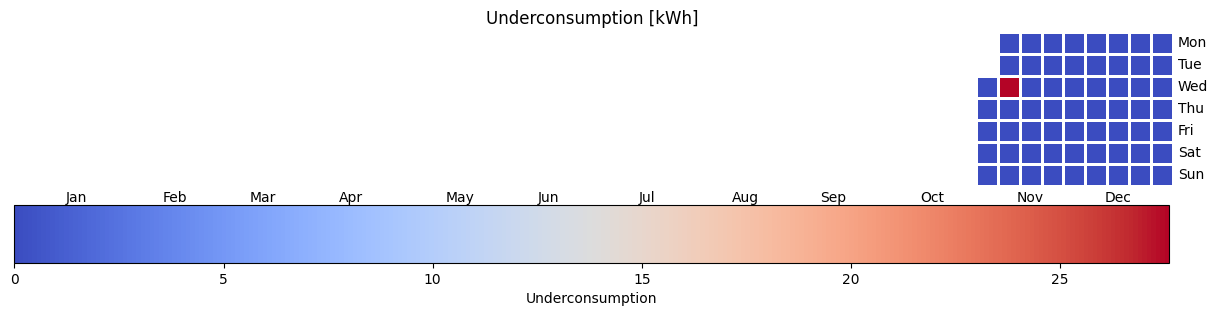

In [20]:
import calmap
import matplotlib as mpl

test['date'] = test.index.date
underconsumption_day = test.groupby('date')['underconsumption'].sum().reset_index()
underconsumption_day['date'] = pd.to_datetime(underconsumption_day['date'])
underconsumption_day = underconsumption_day.set_index('date')

plt.figure(figsize=(15, 5))
calmap.yearplot(underconsumption_day['underconsumption'], year=2017, cmap='coolwarm', fillcolor='white')
plt.title("Underconsumption [kWh]")
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=underconsumption_day['underconsumption'].min(), vmax=underconsumption_day['underconsumption'].max())
cax = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal', pad=0.05)
cax.set_label("Underconsumption")
plt.show()

Same thing as before for overconsumption

c:\Users\SilvioBrandi\VisualStudioProjects\aiis-energy-mllabs\.venv\lib\site-packages\calmap\__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
c:\Users\SilvioBrandi\VisualStudioProjects\aiis-energy-mllabs\.venv\lib\site-packages\calmap\__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]
C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\4294441956.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cax = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal', pad=0.05)

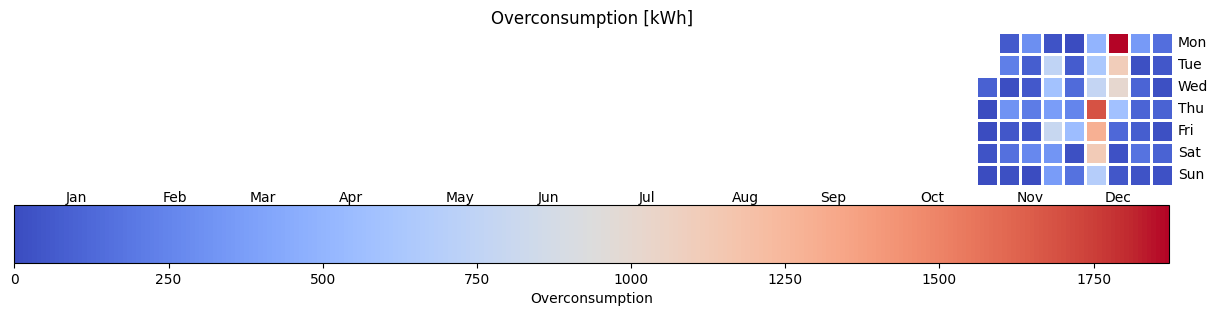

In [21]:
overconsumption_day = test.groupby('date')['overconsumption'].sum().reset_index()
overconsumption_day['date'] = pd.to_datetime(overconsumption_day['date'])
overconsumption_day = overconsumption_day.set_index('date')

plt.figure(figsize=(15, 5))
calmap.yearplot(overconsumption_day['overconsumption'], year=2017, cmap='coolwarm', fillcolor='white')
plt.title("Overconsumption [kWh]")
cmap = mpl.cm.coolwarm
norm = mpl.colors.Normalize(vmin=overconsumption_day['overconsumption'].min(), vmax=overconsumption_day['overconsumption'].max())
cax = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='horizontal', pad=0.05)
cax.set_label("Overconsumption")
plt.show()

The next two cells create a plot to visualize the actual power consumption, estimated power consumption, and the benchmark estimation interval for a specific date, "2017-12-06".

- First, it adds the lower_bounds, upper_bounds, and power_pred (predicted power) columns to the test DataFrame.

- Next, it creates a subset of the test DataFrame containing only data for the date "2017-12-06" and assigns it to the test_subset variable.

- It then initializes a new plot with a size of 15 x 6 inches.

- The actual power consumption is plotted as a line plot using the test_subset.power values.

- The estimated power consumption is plotted as another line plot using the test_subset.power_pred values.

- The benchmark estimation interval is displayed as a shaded area between the lower_bounds and upper_bounds using the fill_between() function. The shading is in gray with 50% transparency (alpha=0.5).

- The x-axis is labeled as "Date" and the y-axis is labeled as "Power".

- The plot title is set to "2017-12-06: Real vs Benchmark".

- A legend is added to the plot to identify the different lines and the shaded area.

- Finally, the plot is displayed using the plt.show() function.

In [22]:
test['lower_bounds'] = lower_bounds
test['upper_bounds'] = upper_bounds
test['power_pred'] = y_pred

C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\3084030116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['lower_bounds'] = lower_bounds
C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\3084030116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['upper_bounds'] = upper_bounds
C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\3084030116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

C:\Users\SilvioBrandi\AppData\Local\Temp\ipykernel_29056\1077234049.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test_subset = test["2017-12-06"]


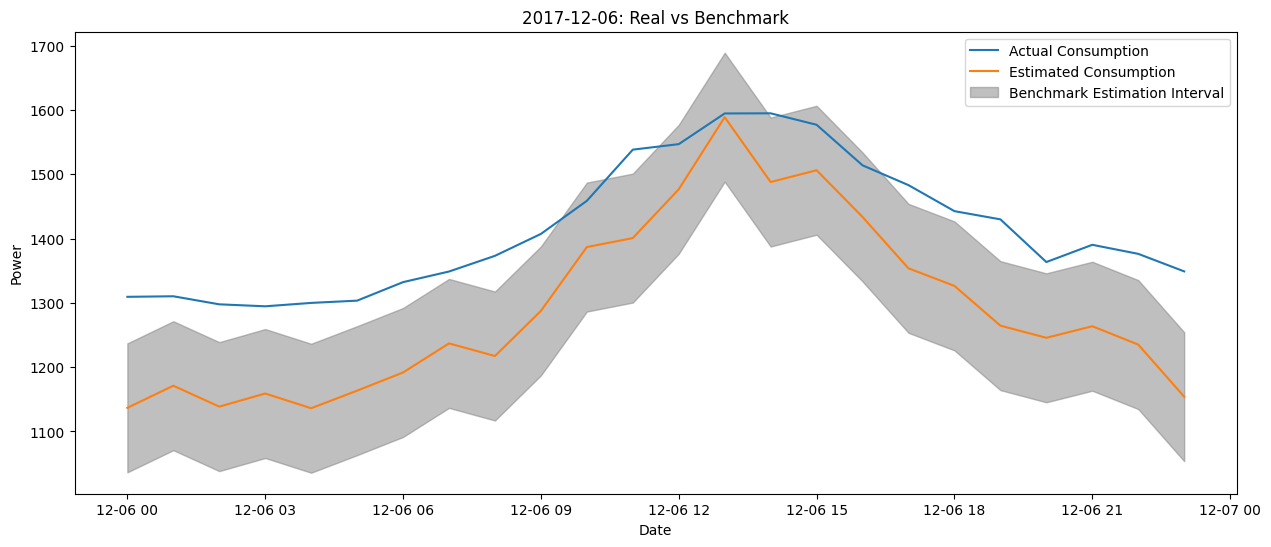

In [23]:
test_subset = test["2017-12-06"]

plt.figure(figsize=(15, 6))
plt.plot(test_subset.index, test_subset.power, label="Actual Consumption")
plt.plot(test_subset.index, test_subset.power_pred, label="Estimated Consumption")
plt.fill_between(test_subset.index, test_subset.lower_bounds, test_subset.upper_bounds, color="gray", alpha=0.5, 
                 label="Benchmark Estimation Interval")
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("2017-12-06: Real vs Benchmark")
plt.legend()
plt.show()